In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        # TODO
        MinMaxScaler(),
        PCA(2)
    )
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 2)
    return X2

In [3]:
def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        # TODO
        KMeans(10)
    )
    model.fit(X)
    return model.predict(X)

In [4]:
def main():
    data = pd.read_csv(sys.argv[1])
#     data = pd.read_csv('monthly-data-labelled.csv')

    X = data.drop(['city', 'year'], axis = 1)
    y = data['city']
    
    X2 = get_pca(X)
    clusters = get_clusters(X)
    plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=20)
    plt.savefig('clusters.png')

    df = pd.DataFrame({
        'cluster': clusters,
        'city': y,
    })
    counts = pd.crosstab(df['city'], df['cluster'])
    print(counts)

cluster          0   1   2   3   4   5   6   7   8   9
city                                                  
Anchorage       17   0   0  12   4   0   0   0  20   3
Atlanta          0   0   0   0   0   0   0  47   0   0
Atlantic City    0  27   0   0   0   0   0  18   0   0
Calgary          0   3   0  11   0  36   0   0   0   2
Chicago          0   3   0   0   0  47   0   1   0   1
Denver           0   1   0   0   0   1   0   7   0   0
Edmonton         9   0   0  19   0   3   0   0   3  17
Gander          19   0   0   1   9   3   0   0   8  11
Halifax          0   0   0   1   0  37   0   0   0  12
London           0   0   0   0   0  38   0   0   0   4
Los Angeles      0   0  39   0   0   0   0   0   0   0
Miami            0   0   0   0   0   0  43   0   0   0
Montreal         8   0   0   2   1   1   0   0   2  14
New Orleans      0   0   0   0   0   0  44   1   0   0
Ottawa          11   0   0   6   2   6   0   0   5  21
Portland         0  35   0   0   0   0   0   3   0   0
Québec    

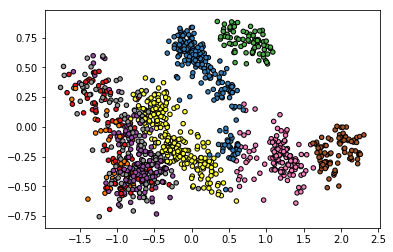

In [5]:
if __name__ == '__main__':
    main()